In [3]:
import sqlite3
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [4]:
#Connect to SQLite database (create if not exists)
conn = sqlite3.connect('ecommerce_db.sqlite')

In [5]:
#Load data from CSV into Pandas DataFrame
df = pd.read_csv('e-commerce_data.csv')

In [6]:
#Clean and transform data as needed before loading into SQL tables
#For simplicity, assuming columns match exactly with the table schema
#Create Products table
df_products = df[['ProductID', 'ProductName', 'Rating', 'NumReviews', 'DateAdded']].drop_duplicates()
df_products.to_sql('Products', conn, if_exists='replace', index=False)


1000

In [7]:
#Create Transactions table
df_transactions = df[['ProductID', 'Price', 'Discount', 'Sales', 'StockQuantity', 'Category']]
df_transactions.to_sql('Transactions', conn, if_exists='replace', index=False)

1000

In [8]:
#Commit changes and close connection
#conn.commit()
#conn.close()

In [9]:
print("Tables 'Products' and 'Transactions' created successfully and data loaded.")


Tables 'Products' and 'Transactions' created successfully and data loaded.


In [3]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('ecommerce_db.sqlite')

# Query data from database
transactions_df = pd.read_sql_query('SELECT * FROM Transactions', conn)
products_df = pd.read_sql_query('SELECT * FROM Products', conn)

# Close the database connection
conn.close()

# Display the data
print("Transactions DataFrame:")
print(transactions_df.head())

print("\nProducts DataFrame:")
print(products_df.head())


Transactions DataFrame:
   ProductID   Price  Discount  Sales  StockQuantity     Category
0          1  400.31      0.08    466             20  Electronics
1          2  235.03      0.33   1332            663  Electronics
2          3  417.90      0.31    252            459  Electronics
3          4  152.70      0.49   1806            475  Electronics
4          5  394.74      0.23   1508            831  Electronics

Products DataFrame:
   ProductID ProductName  Rating  NumReviews   DateAdded
0          1  Headphones     1.7        3772  2023-11-08
1          2  Headphones     2.3        2919  2023-09-26
2          3  Smartwatch     1.8        1184  2023-10-18
3          4  Smartphone     3.4        2047  2023-12-03
4          5      Laptop     1.8        1267  2023-08-08


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv('e-commerce_data.csv')

print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

First few rows of the dataset:
   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded  
0             20      0.08    466  2023-11-08  
1            663      0.33   1332  2023-09-26  
2            459      0.31    252  2023-10-18  
3            475      0.49   1806  2023-12-03  
4            831      0.23   1508  2023-08-08  

Summary statistics:
         ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.000000  1000.000000    1000.000000   
mean    500.500000   253.77551     3.025600  2498.753000     495.395000   
std     288.819436  

In [12]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load dataset
df = pd.read_csv('e-commerce_data.csv')

# Display dataset information
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data cleaning
df = df.dropna()  # Dropping rows with missing values for simplicity

# Convert 'DateAdded' to datetime
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Preview cleaned data
print("\nCleaned data preview:")
print(df.head())

# Calculate total sales and average sales
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()

print(f"\nTotal Sales: {total_sales}")
print(f"Average Sales: {average_sales:.2f}")




Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.3+ KB
None

Missing values:
ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64

Cleaned data preview:
   ProductID ProductName     Category   

C:\Users\sraza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



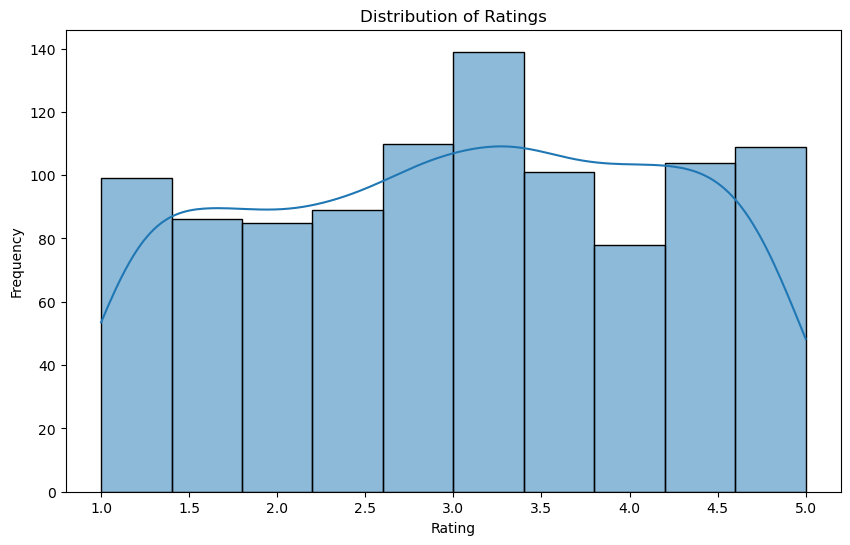

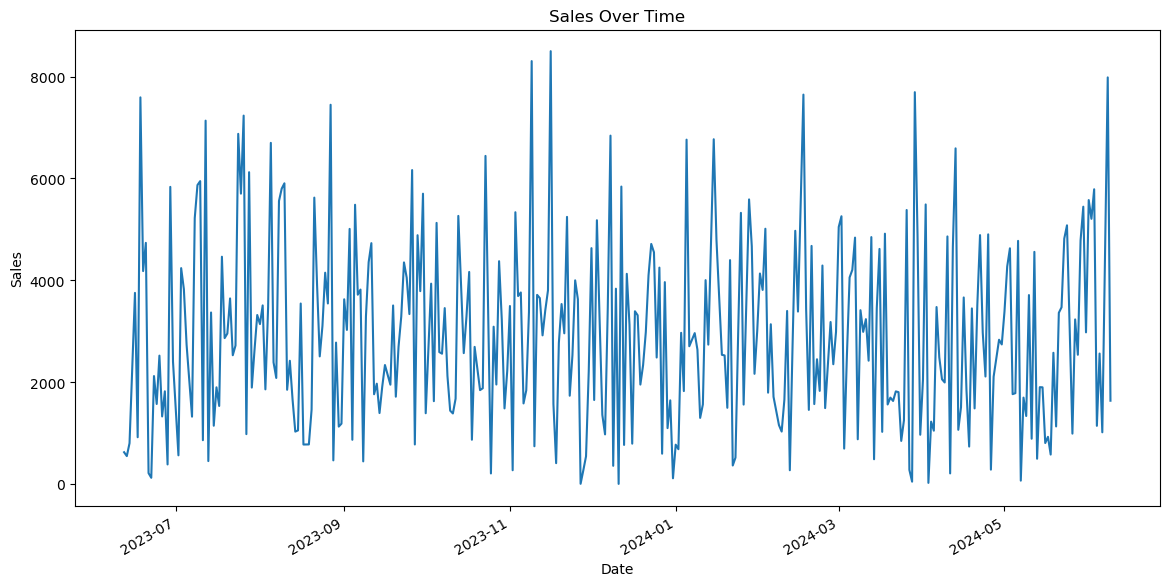

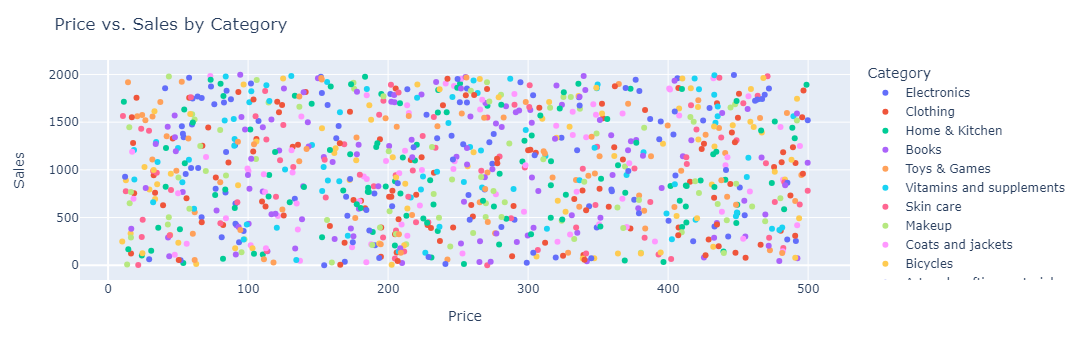

In [14]:
# Visualizations

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Sales Over Time
plt.figure(figsize=(14, 7))
df.groupby('DateAdded')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Interactive Plot with Plotly: Price vs. Sales by Category
fig = px.scatter(df, x='Price', y='Sales', color='Category', hover_data=['ProductName'])
fig.update_layout(title='Price vs. Sales by Category', xaxis_title='Price', yaxis_title='Sales')
fig.show()

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load dataset
df = pd.read_csv('e-commerce_data.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Display dataset information
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data cleaning
df = df.dropna()  # Dropping rows with missing values for simplicity

# Convert 'DateAdded' to datetime
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Preview cleaned data
print("\nCleaned data preview:")
print(df.head())

# Calculate total sales and average sales
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()

print(f"\nTotal Sales: {total_sales}")
print(f"Average Sales: {average_sales:.2f}")

# Calculate total sales by category
total_sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
total_sales_by_category = total_sales_by_category.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Category:")
print(total_sales_by_category)




First few rows of the dataset:
   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded  
0             20      0.08    466  2023-11-08  
1            663      0.33   1332  2023-09-26  
2            459      0.31    252  2023-10-18  
3            475      0.49   1806  2023-12-03  
4            831      0.23   1508  2023-08-08  

Summary statistics:
         ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.000000  1000.000000    1000.000000   
mean    500.500000   253.77551     3.025600  2498.753000     495.395000   
std     288.819436  

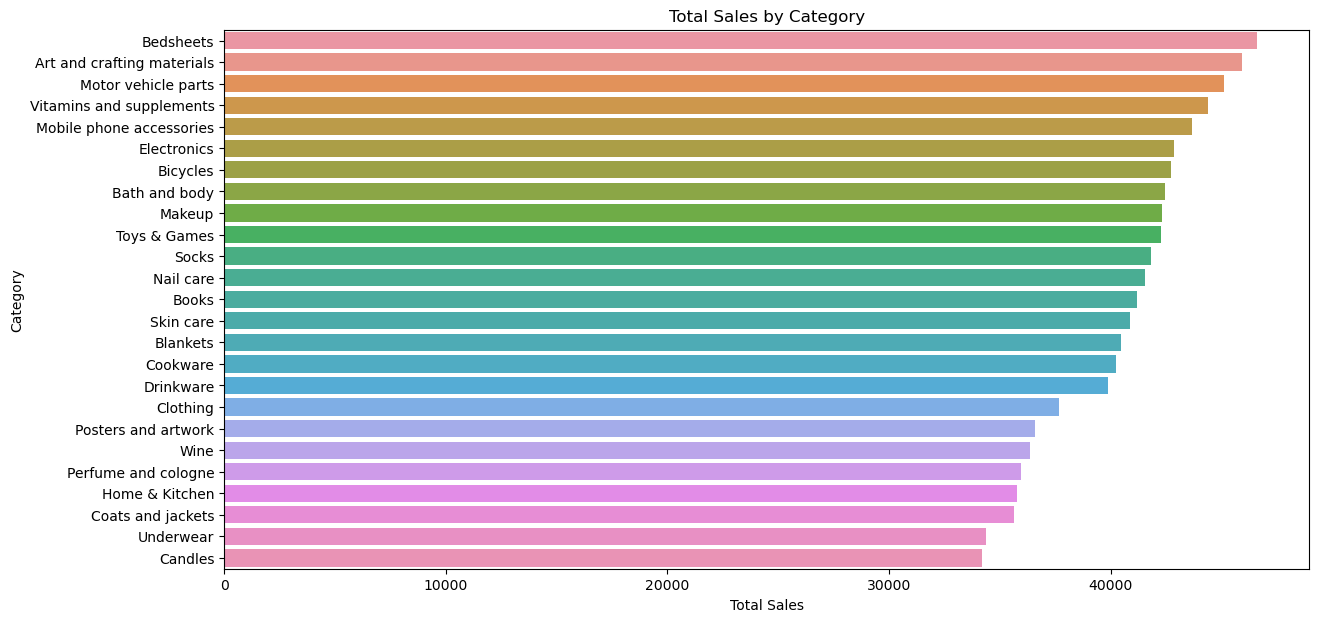

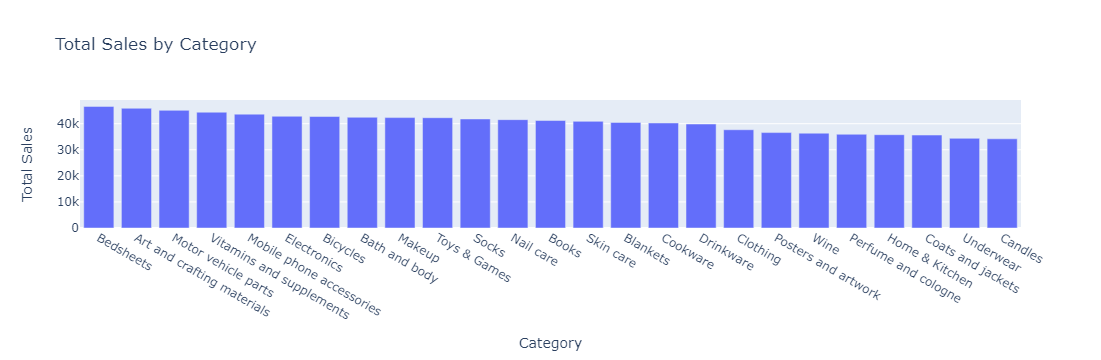

In [23]:
# Visualization of total sales by category using Matplotlib and Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=total_sales_by_category, x='Sales', y='Category')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

# Visualization of total sales by category using Plotly
fig = px.bar(total_sales_by_category, x='Category', y='Sales', title='Total Sales by Category', labels={'Sales': 'Total Sales'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


Top 10 Products by Sales:
        ProductName  Sales
6         Biography  23947
54    Mountain Bike  20069
21         Cleanser  15886
82      Spark Plugs  15745
89    Throw Blanket  15315
93        Vitamin D  15239
42       Headphones  15116
32  Eau de Toilette  14820
27     Denim Jacket  14472
61        Paint Set  14455


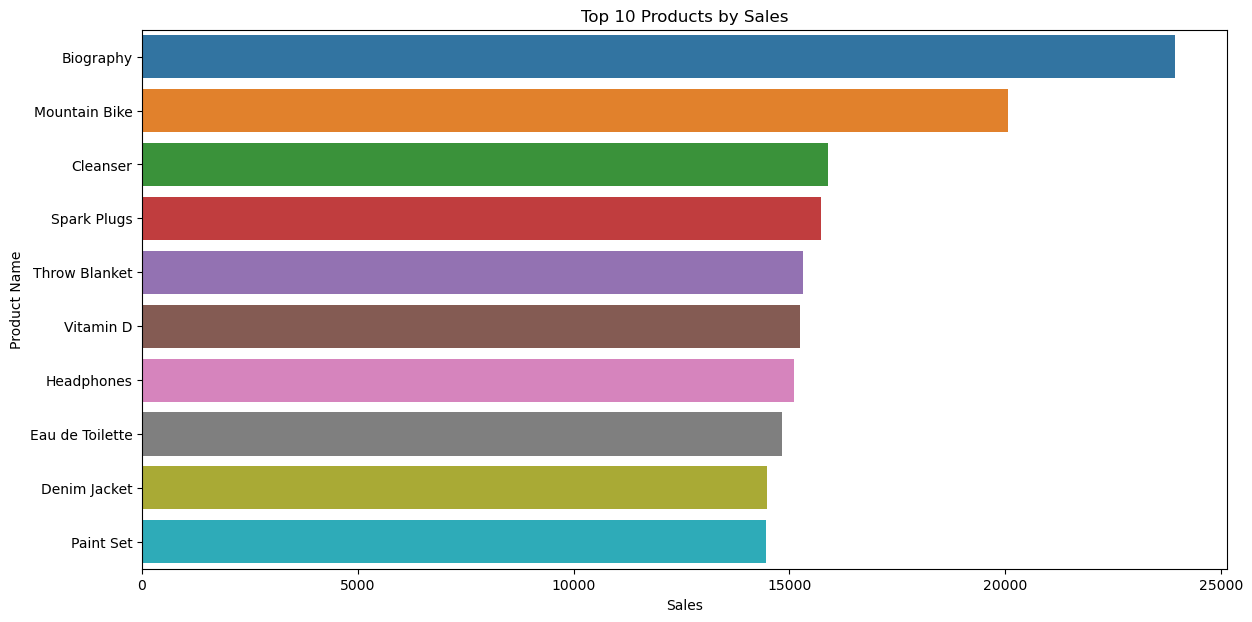

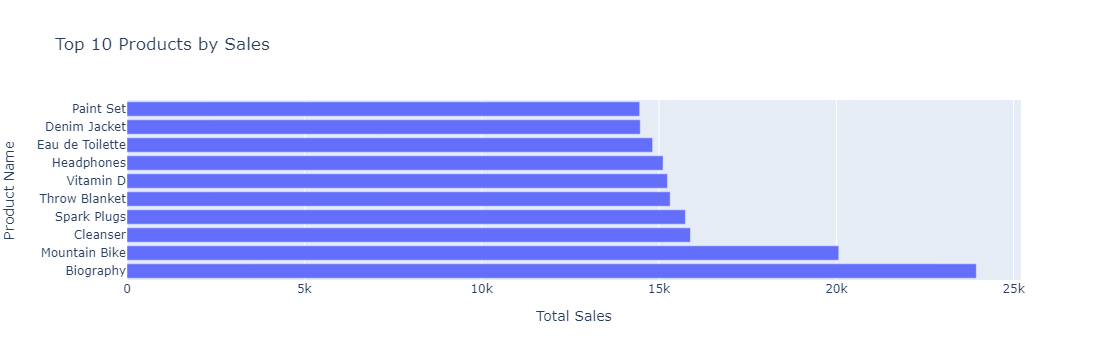

In [30]:
# Calculate top 10 products by sales
top_10_products = df.groupby('ProductName')['Sales'].sum().reset_index().nlargest(10, 'Sales')

print("\nTop 10 Products by Sales:")
print(top_10_products)

# Visualization of top 10 products by sales using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_products, x='Sales', y='ProductName')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

# Visualization of top 10 products by sales using Plotly
fig = px.bar(top_10_products, x='Sales', y='ProductName', title='Top 10 Products by Sales', orientation='h',
             labels={'Sales': 'Total Sales', 'ProductName': 'Product Name'})
fig.show()


Top 10 Categories by Sales:
                      Category  Sales
2                    Bedsheets  46631
0   Art and crafting materials  45912
15         Motor vehicle parts  45116
23    Vitamins and supplements  44402
14    Mobile phone accessories  43660
11                 Electronics  42844
3                     Bicycles  42750
1                Bath and body  42454
13                      Makeup  42337
21                Toys & Games  42295


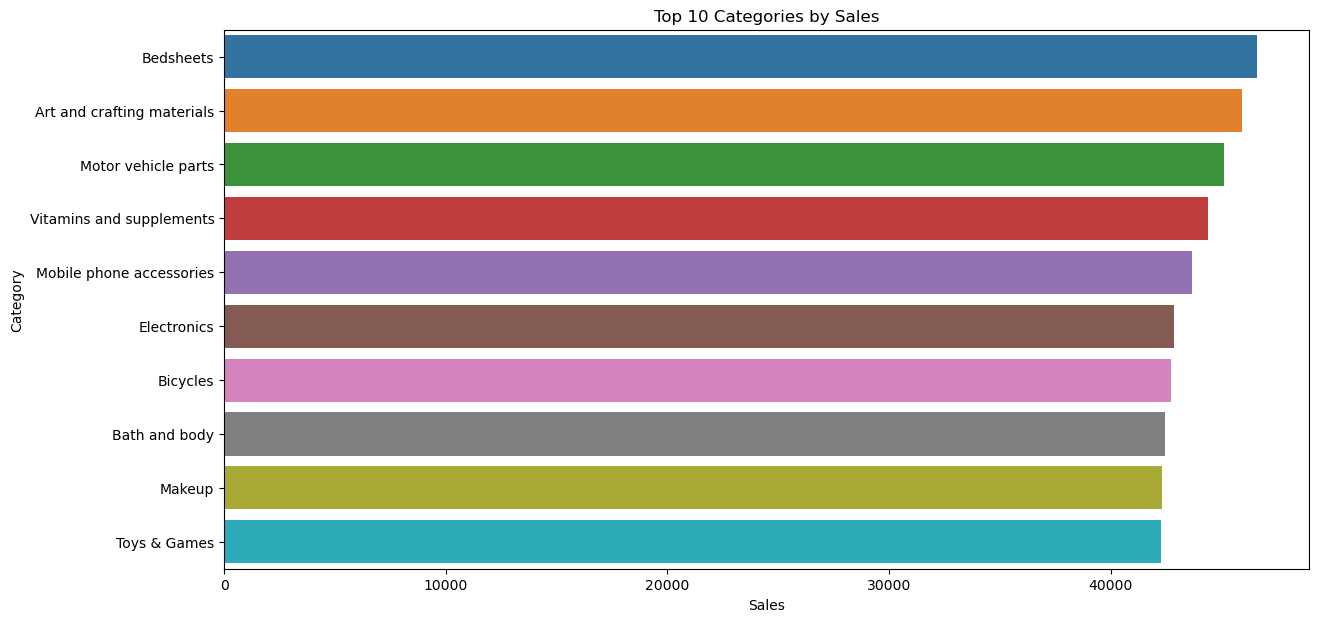

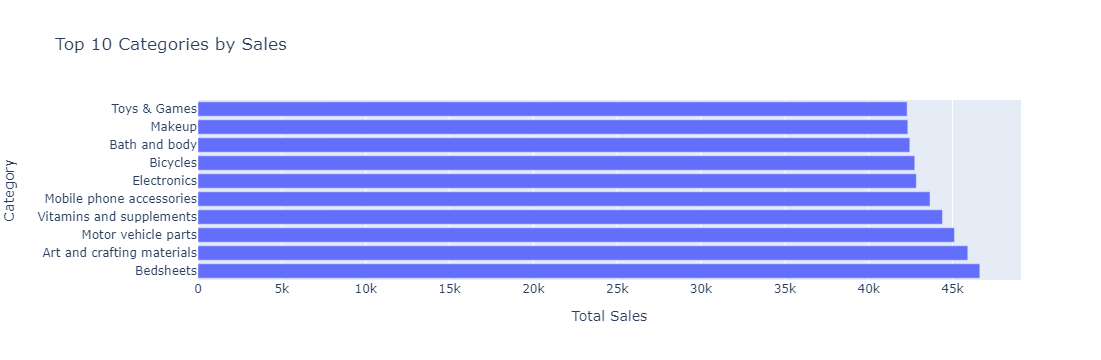

In [31]:
# Calculate top 10 categories by sales
top_10_categories = df.groupby('Category')['Sales'].sum().reset_index().nlargest(10, 'Sales')

print("\nTop 10 Categories by Sales:")
print(top_10_categories)

# Visualization of top 10 categories by sales using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_categories, x='Sales', y='Category')
plt.title('Top 10 Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

# Visualization of top 10 categories by sales using Plotly
fig = px.bar(top_10_categories, x='Sales', y='Category', title='Top 10 Categories by Sales',
             labels={'Sales': 'Total Sales', 'Category': 'Category'})
fig.show()

In [32]:
# Data cleaning (assuming 'Price' column has no missing values)
# Convert 'Price' to numeric if it's not already
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate average price per category
average_price_by_category = df.groupby('Category')['Price'].mean().reset_index()

print("\nAverage Price by Category:")
print(average_price_by_category)


Average Price by Category:
                      Category      Price
0   Art and crafting materials  211.28625
1                Bath and body  238.12625
2                    Bedsheets  272.97575
3                     Bicycles  252.60550
4                     Blankets  225.20375
5                        Books  275.45350
6                      Candles  235.02800
7                     Clothing  265.25400
8            Coats and jackets  274.68050
9                     Cookware  282.79675
10                   Drinkware  258.92450
11                 Electronics  276.14925
12              Home & Kitchen  257.94075
13                      Makeup  259.43825
14    Mobile phone accessories  262.49975
15         Motor vehicle parts  241.38950
16                   Nail care  253.71100
17         Perfume and cologne  256.79825
18         Posters and artwork  217.95550
19                   Skin care  282.06850
20                       Socks  287.12250
21                Toys & Games  269.97450
22    

In [7]:
# Data cleaning (assuming 'Price' column has no missing values)
# Convert 'Price' to numeric if it's not already
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate average price by product
average_price_by_product = df.groupby('ProductName')['Price'].mean().reset_index()

print("\nAverage Price by Product:")
print(average_price_by_product)


Average Price by Product:
         ProductName       Price
0      Action Figure  265.747778
1        Ankle Socks  270.226154
2          Art Print  183.042222
3      Bamboo Sheets  299.282857
4         Bath Salts  214.965455
..               ...         ...
95  Weighted Blanket  236.830000
96        White Wine  202.907000
97        Wine Glass  234.146364
98       Winter Coat  235.114000
99        Wool Socks  331.466000

[100 rows x 2 columns]
